In [1]:
# initialization for my classroom
import os
from datetime import datetime as dt

def logfile(user=os.environ.get('JUPYTERHUB_USER') or 'jovyan'):
    prefix='/srv'
    if os.path.isdir(prefix) and os.access(prefix, os.W_OK):
        prefix+=('/'+user)
        if not os.path.isdir(prefix):
            os.makedirs(prefix)
    else:
        prefix='.'
    return prefix+'/'+dt.now().strftime('%Y%m%d')+'.log'

path=logfile()
#%logstop
%logstart -otq $path append

# [python - cannot override sys.excepthook - Stack Overflow](https://stackoverflow.com/questions/1261668/cannot-override-sys-excepthook/28758396)
# https://github.com/ipython/ipython/blob/e6432249582e05f438303ce73d082a0351bb383e/IPython/core/interactiveshell.py#L1952

import sys
import traceback
import IPython

try:
    _showtraceback
except NameError:
    _showtraceback=IPython.core.interactiveshell.InteractiveShell.showtraceback

try:
    _showsyntaxerror
except NameError:
    _showsyntaxerror=IPython.core.interactiveshell.InteractiveShell.showsyntaxerror

import logging
logging.basicConfig(filename=path.replace('.log','-exc.log'), format='%(asctime)s %(message)s', level=logging.ERROR, force=True)

import sys
import traceback
import IPython

def showtraceback(self, *args, **kwargs):
    etype, value, tb = self._get_exc_info(kwargs.get('exc_tuple'))
    stb = self.InteractiveTB.structured_traceback(
        etype, value, tb, tb_offset=kwargs.get('tb_offset'))
    logging.error(os.environ.get('JUPYTERHUB_USER') or 'jovyan')
    logging.error(self.InteractiveTB.stb2text(stb))
    _showtraceback(self, *args, **kwargs)

def showsyntaxerror(self, *args, **kwargs):
    etype, value, last_traceback = self._get_exc_info()
    elist = traceback.extract_tb(last_traceback) if kwargs.get('running_compiled_code') else []
    stb = self.SyntaxTB.structured_traceback(etype, value, elist)
    logging.error(os.environ.get('JUPYTERHUB_USER') or 'jovyan')
    logging.error(self.InteractiveTB.stb2text(stb))
    _showsyntaxerror(self, *args, **kwargs)

IPython.core.interactiveshell.InteractiveShell.showtraceback = showtraceback
IPython.core.interactiveshell.InteractiveShell.showsyntaxerror = showsyntaxerror

# 課題: Napierによる乗算のない世界

Step-1) `nest_list()` を使って $R=10^5=10000$ の時のNapierの対数表の元リストを作成する:

In [4]:
import numpy as np

def nest_list(f, x, c=1):
    while True:
        yield x
        x = f(x)
        if x < c:
            break
    yield x

In [5]:
napier5=np.array(list(nest_list(lambda l: l*(1-10**(-5)), 10**5, 1)))

In [6]:
napier5.size, napier5[-1]

(1151288, 0.9999979002909413)

In [7]:
napier5[:100]

array([100000.        ,  99999.        ,  99998.00001   ,  99997.00003   ,
        99996.00006   ,  99995.0001    ,  99994.00015   ,  99993.00021   ,
        99992.00027999,  99991.00035999,  99990.00044999,  99989.00054998,
        99988.00065998,  99987.00077997,  99986.00090996,  99985.00104995,
        99984.00119994,  99983.00135993,  99982.00152992,  99981.0017099 ,
        99980.00189989,  99979.00209987,  99978.00230985,  99977.00252982,
        99976.0027598 ,  99975.00299977,  99974.00324974,  99973.00350971,
        99972.00377967,  99971.00405963,  99970.00434959,  99969.00464955,
        99968.0049595 ,  99967.00527945,  99966.0056094 ,  99965.00594935,
        99964.00629929,  99963.00665922,  99962.00702916,  99961.00740909,
        99960.00779901,  99959.00819893,  99958.00860885,  99957.00902877,
        99956.00945868,  99955.00989858,  99954.01034848,  99953.01080838,
        99952.01127827,  99951.01175816,  99950.01224804,  99949.01274792,
        99948.01325779,  

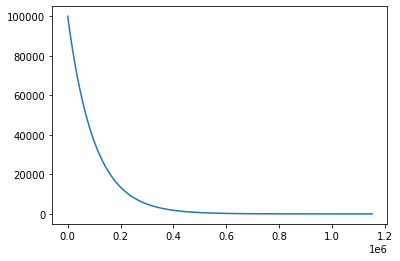

In [8]:
import matplotlib.pyplot as plt

x = np.linspace(0,napier5.size,num=napier5.size)
plt.plot(x,napier5)

Step-2) 上で求めた配列 ```napier5``` を検索し、$R=5$ のときの Napier の対数を求める:

$$
n = \log_{1-10^{-5}}\left( \frac{p_{n}}{10^5} \right)
$$

* [numpy.searchsorted — NumPy v1.23 Manual](https://numpy.org/doc/stable/reference/generated/numpy.searchsorted.html)

昇順に並べ替える (この場合は、逆順にする)

In [9]:
napier5[::-1][:100]

array([0.9999979 , 1.0000079 , 1.0000179 , 1.0000279 , 1.0000379 ,
       1.0000479 , 1.0000579 , 1.0000679 , 1.0000779 , 1.0000879 ,
       1.00009791, 1.00010791, 1.00011791, 1.00012791, 1.00013791,
       1.00014791, 1.00015791, 1.00016792, 1.00017792, 1.00018792,
       1.00019792, 1.00020792, 1.00021793, 1.00022793, 1.00023793,
       1.00024793, 1.00025793, 1.00026794, 1.00027794, 1.00028794,
       1.00029795, 1.00030795, 1.00031795, 1.00032796, 1.00033796,
       1.00034796, 1.00035797, 1.00036797, 1.00037797, 1.00038798,
       1.00039798, 1.00040799, 1.00041799, 1.00042799, 1.000438  ,
       1.000448  , 1.00045801, 1.00046801, 1.00047802, 1.00048802,
       1.00049803, 1.00050803, 1.00051804, 1.00052804, 1.00053805,
       1.00054805, 1.00055806, 1.00056806, 1.00057807, 1.00058808,
       1.00059808, 1.00060809, 1.00061809, 1.0006281 , 1.00063811,
       1.00064811, 1.00065812, 1.00066813, 1.00067813, 1.00068814,
       1.00069815, 1.00070815, 1.00071816, 1.00072817, 1.00073

`numpy.searchsorted()`を使い、指定した値になる添字 (index) を求める

In [10]:
np.searchsorted(napier5[::-1], 1234), np.searchsorted(napier5[::-1], 5678)

(711799, 864432)

リストを逆順にしたので、正順の際の添字に戻す:

In [11]:
napier5.size-np.searchsorted(napier5[::-1], 1234), napier5.size-np.searchsorted(napier5[::-1], 56789)

(439489, 56583)

変換がいちいち煩わしいので、正負逆転した配列 (この場合、昇順になる) で `numpy.searchsorted()` を使う

In [12]:
np.searchsorted(-napier5, -1234), np.searchsorted(-napier5, -56789)

(439489, 56583)

以上をプログラム `napier5_log()` に反映する:

In [13]:
napier5[0], napier5[-1]

(100000.0, 0.9999979002909413)

In [14]:
def napier5_log(x):
    if x < napier5[0] and x > napier5[-1]:
        return np.searchsorted(-napier5, -x)
    else:
        raise IndexError

In [15]:
napier5_log(1234), napier5_log(56789)

(439489, 56583)

In [16]:
napier5[439489], napier5[56583]

(1233.9966508401064, 56788.699690421614)

In [17]:
((1-10**-5)**439489), ((1-10**-5)**56583)

(0.012339966508401898, 0.5678869969042134)

In [18]:
import math
math.log(napier5[439489]/10**5, 1-10**-5), math.log(napier5[56583]/10**5, 1-10**-5)

(439489.00000000675, 56582.99999999951)

Step-3) 指数法則: $\log(x \times y) = \log(x) + \log(y)$ を使って、掛け算を足け算に変換して計算するプログラムを記述せよ:

In [19]:
napier5_log(1234), napier5_log(56789)

(439489, 56583)

In [20]:
napier5_log(1234) + napier5_log(56789)

496072

In [21]:
napier5[496072]*10**5, 1234*56789

(70077065.22354518, 70077626)

In [22]:
def napier5_times(x, y):
    ### BEGIN SOLUTION
    return napier5[napier5_log(x)+napier5_log(y)] * 10**5
    ### END SOLUTION

In [46]:
napier5_times(1234, 56789), 1234*56789

(70077065.22354518, 70077626)

In [45]:
math.isclose(napier5_times(1234, 56789), 1234*56789, rel_tol=10**-5)

True

---
以下、採点用のセルにつき編集できない:

In [2]:
from nose.tools import assert_equal, assert_true

In [48]:
assert_true(math.isclose(1234*56789,  napier5_times(1234, 56789) , rel_tol=10**-5))